# VGGNet

In [1]:
import tensorflow as tf

In [2]:
num_classes = 100
input_shape = [224, 224, 3]

batch_size = 16
num_epochs = 10

## Create model

In [3]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import functools

In [1]:
from IPython.display import Image

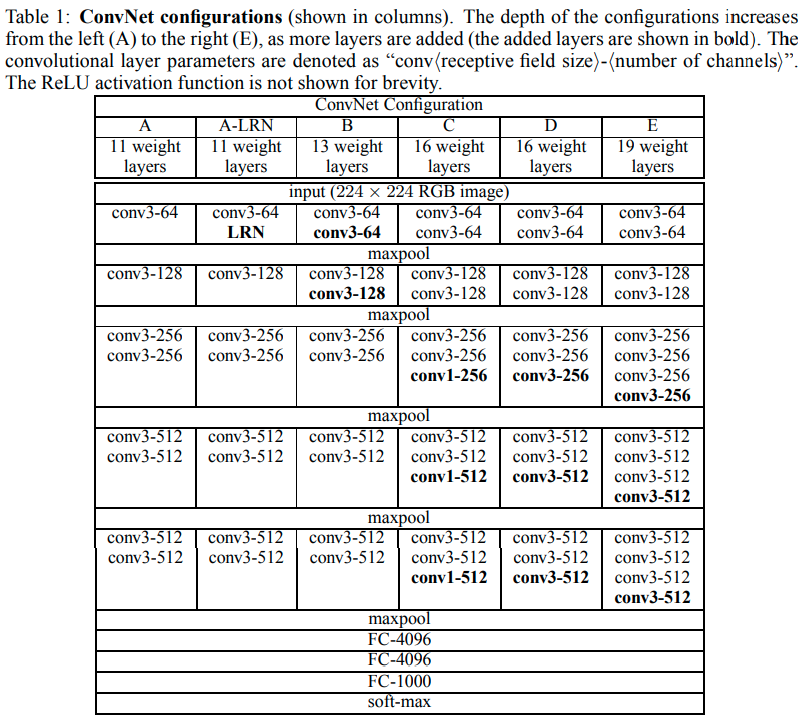

In [3]:
Image('image/vggnet_table_1.png')

In [4]:
Conv3_64 = functools.partial(Conv2D,
                            filters=64,
                            kernel_size=(3, 3),
                            padding='same',
                            activation='relu')

Conv3_128 = functools.partial(Conv2D,
                             filters=128,
                             kernel_size=(3, 3),
                             padding='same',
                             activation='relu')

Conv3_256 = functools.partial(Conv2D,
                             filters=256,
                             kernel_size=(3, 3),
                             padding='same',
                             activation='relu')

Conv3_512 = functools.partial(Conv2D,
                             filters=512,
                             kernel_size=(3, 3),
                             padding='same',
                             activation='relu')
Dense_4096 = functools.partial(Dense,
                          units=4096, 
                          kernel_regularizer=tf.keras.regularizers.L2(0.0005),
                          activation='relu')

In [5]:
def VGGNet(input_shape, num_classes, model_type: 16 or 19 =16):    
    input = Input(shape=input_shape, name='Input')
    
    x = Conv3_64(name='block1_conv1')(input)
    x = Conv3_64(name='block1_conv2')(x)
    x = MaxPooling2D(pool_size=2, padding='same', name='block1_pool')(x)
    
    x = Conv3_128(name='block2_conv1')(x)
    x = Conv3_128(name='block2_conv2')(x)
    x = MaxPooling2D(pool_size=2, padding='same', name='block2_pool')(x)
    
    x = Conv3_256(name='block3_conv1')(x)
    x = Conv3_256(name='block3_conv2')(x)
    x = Conv3_256(name='block3_conv3')(x)
    if model_type == 19:
        x = Conv3_256(name='block3_conv4')(x)
    x = MaxPooling2D(pool_size=2, padding='same', name='block3_pool')(x)
    
    x = Conv3_512(name='block4_conv1')(x)
    x = Conv3_512(name='block4_conv2')(x)
    x = Conv3_512(name='block4_conv3')(x)
    if model_type == 19:
        x = Conv3_512(name='block4_conv4')(x)
    x = MaxPooling2D(pool_size=2, padding='same', name='block4_pool')(x)
    
    x = Conv3_512(name='block5_conv1')(x)
    x = Conv3_512(name='block5_conv2')(x)
    x = Conv3_512(name='block5_conv3')(x)
    if model_type == 19:
        x = Conv3_512(name='block5_conv4')(x)
    x = MaxPooling2D(pool_size=2, padding='same', name='block5_pool')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense_4096(name='fc1')(x)
    x = Dropout(0.5)(x)
    x = Dense_4096(name='fc2')(x)  
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax', name='ouput')(x)

    model = Model(inputs=input, outputs=output)
    if model_type == 19:
        model._name = 'VGG19'
    else:
        model._name = 'VGG16'
    
    return model

In [6]:
def VGG16(input_shape, num_classes):
    return VGGNet(input_shape=input_shape,
                 num_classes=num_classes,
                 model_type=16)

def VGG19(input_shape, num_classes):
    return VGGNet(input_shape=input_shape,
                 num_classes=num_classes,
                 model_type=19)

In [7]:
batch_input_shape = tf.TensorShape((None, *input_shape))

In [8]:
model = VGG16(input_shape, num_classes)
model.build(input_shape=batch_input_shape)
model.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model = VGG19(input_shape, num_classes)
model.build(input_shape=batch_input_shape)
model.summary()

Model: "VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
num_classes = 10
input_shape = [32, 32, 3]

batch_size = 16
num_epochs = 40

In [11]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_train = len(x_train)
num_val = len(x_test)

print('# for train : %d'%(num_train))
print('# for valid : %d'%(num_val))

# for train : 50000
# for valid : 10000


In [12]:
# str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
str_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [37]:
def MiniVGGNet(input_shape, num_classes):
    input = Input(shape=input_shape, name='Input')
    
    x = Conv3_64(name='block1_conv1')(input)
    x = Conv3_64(name='block1_conv2')(x)
    x = MaxPooling2D(pool_size=2, padding='same', name='block1_pool')(x)
    
    x = Conv3_128(name='block2_conv1')(x)
    x = Conv3_128(name='block2_conv2')(x)
    x = MaxPooling2D(pool_size=2, padding='same', name='block2_pool')(x)
    
    x = Conv3_256(name='block3_conv1')(x)
    x = Conv3_256(name='block3_conv2')(x)
    x = Conv3_256(name='block3_conv3')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu',
             kernel_regularizer=tf.keras.regularizers.L2(0.0005),
             name='fc1')(x)
    x = Dropout(0.5, name='dropout1')(x)
    x = Dense(256, activation='relu',
             kernel_regularizer=tf.keras.regularizers.L2(0.0005),
             name='fc2')(x)
    output = Dense(num_classes, activation='softmax', name='ouput')(x)

    model = Model(inputs=input, outputs=output)
    model._name = 'VGG_mini'
    
    return model

In [38]:
model = MiniVGGNet(input_shape, num_classes)
model.build(input_shape=batch_input_shape)
model.summary()

Model: "VGG_mini"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

## Tensorboard

In [39]:
model_dir = './models/vggnet'

In [46]:
import io
import random

import numpy as np
import matplotlib.pyplot as plt

file_writer = tf.summary.create_file_writer(model_dir)

def plot_to_image(figure):
      """Converts the matplotlib plot specified by 'figure' to a PNG image and
      returns it. The supplied figure is closed and inaccessible after this call."""
      # Save the plot to a PNG in memory.
      buf = io.BytesIO()
      plt.savefig(buf, format='png')
      # Closing the figure prevents it from being displayed directly inside
      # the notebook.
      plt.close(figure)
      buf.seek(0)
      # Convert PNG buffer to TF image
      image = tf.image.decode_png(buf.getvalue(), channels=4)
      # Add the batch dimension
      image = tf.expand_dims(image, 0)
      return image

def image_grid():
    test_images = tf.keras.applications.vgg16.preprocess_input(x_test)
    pred = model.predict(test_images)
    pred = np.argmax(pred, axis=1)
    figure = plt.figure(figsize=(10,10))
    
    random_index = random.sample(range(len(x_test)), 25)
    for i in range(25):
        # Start next subplot.
        plt.subplot(5, 5, i + 1, title=str_labels[pred[random_index[i]]])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[random_index[i]], cmap=plt.cm.binary)

    return figure

def log_images(epoch, logs):
    figure = image_grid()
    with file_writer.as_default():
        tf.summary.image("25 test data examples", plot_to_image(figure), step=0)

## Training

In [47]:
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,decay=1e-6,nesterov=True)
optimizer = 'adam'
accuracy_metric = tf.metrics.SparseCategoricalAccuracy(name='acc')
top5_accuracy_metric = tf.metrics.SparseTopKCategoricalAccuracy(k=5, name='top5_acc')

In [48]:
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=[accuracy_metric, top5_accuracy_metric])

In [49]:
import os

In [50]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=8, monitor='val_loss',
                                    restore_best_weights=True),
    
    tf.keras.callbacks.TensorBoard(log_dir=model_dir, 
                                   histogram_freq=0, 
                                   write_graph=True,
                                   write_images=True,
                                   update_freq=100),
    
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(model_dir, 'weights-epoch{epoch:02d}.h5')),
    
    tf.keras.callbacks.LambdaCallback(on_epoch_end=log_images)
]

In [51]:
train_dataset = (tf.keras.applications.vgg16.preprocess_input(x_train), y_train)
val_dataset = (tf.keras.applications.vgg16.preprocess_input(x_test), y_test)

In [53]:
import math

train_steps_per_epoch = math.ceil(num_train / batch_size)
val_steps_per_epoch = math.ceil(num_val / batch_size)

history = model.fit(*train_dataset,
                        epochs=num_epochs,
                        steps_per_epoch=train_steps_per_epoch,
                        validation_data=(val_dataset),
                        validation_steps=val_steps_per_epoch,
                        verbose=1, callbacks=callbacks)

Epoch 1/40
3125/3125 [==============================] - 31s 10ms/step - loss: 1.5148 - acc: 0.5206 - top5_acc: 0.9303 - val_loss: 1.5159 - val_acc: 0.5279 - val_top5_acc: 0.9366
Epoch 2/40
3125/3125 [==============================] - 30s 10ms/step - loss: 1.4291 - acc: 0.5764 - top5_acc: 0.9425 - val_loss: 1.3337 - val_acc: 0.6097 - val_top5_acc: 0.9544
Epoch 3/40
3125/3125 [==============================] - 30s 10ms/step - loss: 1.3737 - acc: 0.6058 - top5_acc: 0.9503 - val_loss: 1.3827 - val_acc: 0.6089 - val_top5_acc: 0.9544
Epoch 4/40
3125/3125 [==============================] - 30s 10ms/step - loss: 1.3728 - acc: 0.6161 - top5_acc: 0.9537 - val_loss: 1.4565 - val_acc: 0.5947 - val_top5_acc: 0.9470
Epoch 5/40
3125/3125 [==============================] - 30s 10ms/step - loss: 1.3589 - acc: 0.6307 - top5_acc: 0.9554 - val_loss: 1.3621 - val_acc: 0.6290 - val_top5_acc: 0.9570
Epoch 6/40
3125/3125 [==============================] - 29s 9ms/step - loss: 1.3444 - acc: 0.6416 - top5_acc: 

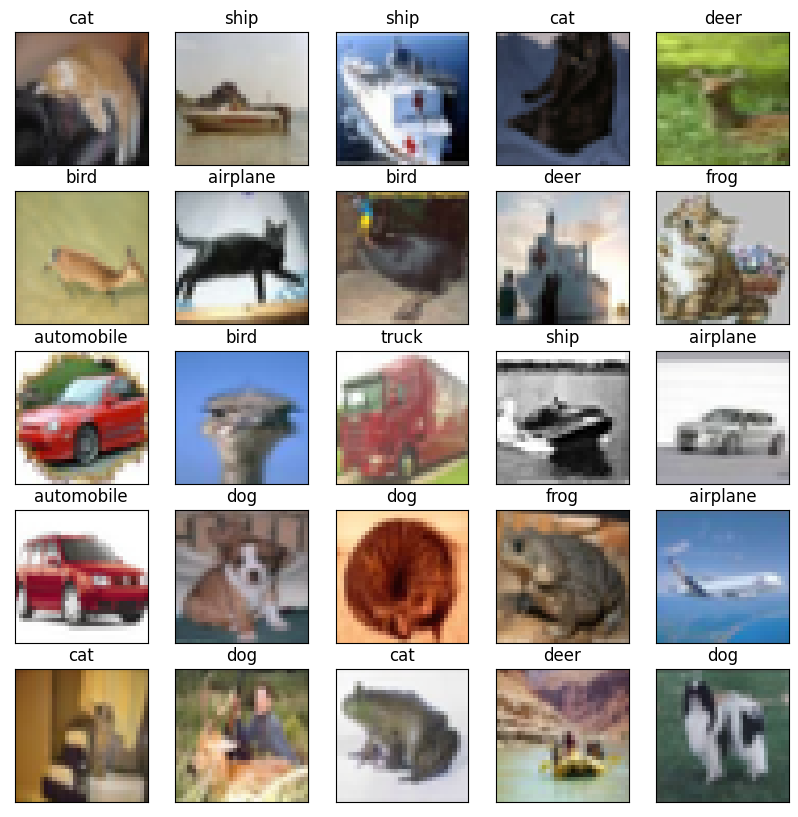

In [55]:
image_grid()